<a href="https://colab.research.google.com/github/Ebonica/EBONICA-SALETH-CVIP-Data-Science-/blob/main/EDA_TERRORISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,OneHotEncoder


In [3]:
from google.colab import files
uploaded=files.upload()

Saving globalterrorismdb_0718dist.csv.zip to globalterrorismdb_0718dist.csv.zip


In [4]:
encoding = 'latin1'
df = pd.read_csv('globalterrorismdb_0718dist.csv.zip', compression='zip', encoding=encoding)

<ipython-input-4-36dc8aa69455>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv.zip', compression='zip', encoding=encoding)


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


**DATA ANALYSIS**

In [ ]:
print("First Few Rows:")
df.head()

First Few Rows:


,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
columns_with_only_nan = df.isna().all()

# Prints the columns with only NaN values
print(columns_with_only_nan)

eventid       False
Year          False
Month         False
Day           False
approxdate    False
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related       False
Length: 135, dtype: bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
print("Dataset Shape:")
df.shape

Dataset Shape:


(181691, 135)

In [ ]:
df.dtypes

eventid        int64
Year           int64
Month          int64
Day            int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df.iloc[1000]

eventid       197109020002
Year                  1971
Month                    9
Day                      2
approxdate             NaN
                  ...     
INT_LOG                 -9
INT_IDEO                -9
INT_MISC                 0
INT_ANY                 -9
related                NaN
Name: 1000, Length: 135, dtype: object

In [ ]:
print(df.Year.nunique())
print(df.Year.unique())
print(df.Year.value_counts())

47
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64


In [ ]:
print(df.Month.nunique())
print(df.Month.unique())
print(df.Month.value_counts())

13
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64


In [ ]:
print(df.Day.nunique())
print(df.Day.unique())
print(df.Day.value_counts())

32
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: Day, dtype: int64


In [ ]:
print(df.Country.nunique())
print(df.Country.unique())
print(df.Country.value_counts())

205
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibi

In [ ]:
print(df.Region.nunique())
print(df.Region.unique())
print(df.Region.value_counts())

12
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


In [ ]:
print(df.AttackType.nunique())
print(df.AttackType.unique())
print(df.AttackType.value_counts())

9
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


In [ ]:
print(df.Target_type.nunique())
print(df.Target_type.unique())
print(df.Target_type.value_counts())

22
['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft   

In [ ]:
print(df.Group.nunique())
print(df.Group.unique())
print(df.Group.value_counts())

3537
['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64


In [ ]:
print(df.Killed.nunique())
print(df.Killed.unique())
print(df.Killed.value_counts())

205
[1.000e+00 0.000e+00       nan 7.000e+00 4.700e+01 2.000e+00 3.600e+01
 5.000e+00 3.000e+00 4.000e+00 2.500e+01 1.500e+01 2.600e+01 8.000e+00
 8.100e+01 6.000e+00 9.000e+00 1.600e+01 3.000e+01 3.100e+01 1.200e+01
 2.100e+01 1.400e+01 8.800e+01 1.100e+01 1.000e+01 2.700e+01 1.800e+01
 2.200e+01 1.900e+01 9.200e+01 1.300e+01 7.300e+01 1.000e+02 4.200e+01
 4.300e+01 1.700e+01 9.800e+01 4.220e+02 4.800e+01 3.400e+01 5.400e+01
 5.000e+01 3.500e+01 2.000e+01 4.100e+01 3.700e+01 2.800e+01 4.000e+01
 3.200e+01 8.500e+01 2.300e+01 3.000e+02 6.000e+01 2.400e+01 5.800e+01
 7.000e+01 8.700e+01 4.500e+01 3.800e+01 2.900e+01 7.400e+01 8.300e+01
 9.000e+01 6.600e+01 8.000e+01 6.700e+01 5.100e+01 3.900e+01 1.140e+02
 1.240e+02 7.600e+01 3.300e+01 7.500e+01 5.700e+01 6.200e+01 4.600e+01
 5.600e+01 6.300e+01 1.200e+02 1.020e+02 7.800e+01 7.900e+01 5.200e+01
 7.700e+01 2.000e+02 4.900e+01 1.110e+02 1.650e+02 4.400e+01 2.410e+02
 6.400e+01 1.080e+02 6.500e+01 1.320e+02 2.700e+02 2.280e+02 1.100e+02
 1

In [ ]:
print(df.Wounded.nunique())
print(df.Wounded.unique())
print(df.Wounded.value_counts())

238
[0.000e+00       nan 1.000e+00 2.000e+00 7.000e+00 9.000e+00 1.700e+01
 5.000e+00 3.000e+00 1.000e+01 1.200e+01 2.000e+01 4.000e+00 1.100e+01
 2.700e+01 1.300e+01 1.900e+01 1.300e+02 5.600e+01 2.400e+01 6.000e+00
 7.200e+01 2.380e+02 5.500e+01 1.500e+01 8.000e+00 1.800e+01 5.000e+01
 3.400e+01 1.400e+01 7.000e+01 1.020e+02 4.100e+01 4.800e+01 3.600e+01
 2.500e+01 8.100e+01 5.400e+01 5.300e+01 1.000e+02 4.500e+01 3.300e+01
 4.000e+01 6.200e+01 7.400e+01 2.200e+01 3.100e+01 1.600e+01 3.000e+01
 2.850e+02 2.300e+01 4.200e+01 4.300e+01 7.600e+01 4.400e+01 5.200e+01
 4.600e+01 4.900e+01 1.600e+02 3.700e+01 2.100e+01 6.000e+01 7.800e+01
 2.600e+01 2.800e+01 3.900e+01 3.800e+01 3.500e+01 3.200e+01 8.000e+01
 4.700e+01 1.880e+02 2.150e+02 8.500e+01 7.500e+01 1.610e+02 9.000e+01
 3.000e+02 9.500e+01 1.350e+02 6.100e+01 1.380e+02 7.100e+01 7.000e+02
 6.600e+01 1.360e+02 1.200e+02 2.170e+02 3.190e+02 1.330e+02 6.800e+01
 7.300e+01 2.900e+01 7.510e+02 2.000e+02 1.120e+02 2.500e+02 8.200e+01
 1

In [ ]:
print(df.Summary.nunique())
print(df.Summary.unique())
print(df.Summary.value_counts())

112492
[nan
 '1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.'
 '1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.'
 ...
 '12/31/2017: Assailants set fire to houses in Kubentog, Datu Hoffer, Maguindanao, Philippines. There were no reported casualties in the attack. No group claimed responsibility for the incident; however, sources attributed the attack to the Bangsamoro Islamic Freedom Movement (BIFM).'
 '12/31/2017: Assailants threw a grenade at a Forest Department office in Mantripukhri neighborhood,

In [ ]:
print(df.Motive.nunique())
print(df.Motive.unique())
print(df.Motive.value_counts())

14490
[nan 'To protest the Cairo Illinois Police Deparment'
 'To protest the War in Vietnam and the draft' ...
 'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.'
 'The specific motive is unknown; however, sources noted that the targeted building housed migrants.'
 'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.']
Unknown                                                                                                                                                                                                                                                                                                                                                                  14889
The specific motive for

In [ ]:
print(df.Weapon_type.nunique())
print(df.Weapon_type.unique())
print(df.Weapon_type.value_counts())

12
['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological 

In [ ]:
print(df.Target.nunique())
print(df.Target.unique())
print(df.Target.value_counts())

86006
['Julio Guzman' 'Nadine Chaval, daughter' 'Employee' ...
 'Personal Security Officer of Council Member Ihuing Pame: Prafulla Phukan'
 'Jewelry Shop' 'Hmeymim Air Base']
Civilians                  6461
Unknown                    5918
Soldiers                   3157
Patrol                     2942
Checkpoint                 2905
                           ... 
Manager Sanat Raj             1
Military/ Police patrol       1
Thor 67 Outpost               1
Employee's Vehicle            1
Hmeymim Air Base              1
Name: Target, Length: 86006, dtype: int64


In [ ]:
# Target and Impact
print("Casualties Statistics:")
print("Total Killed:", df['Killed'].sum())
print("Total Wounded:", df['Wounded'].sum())

Casualties Statistics:
Total Killed: 411868.0
Total Wounded: 523869.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


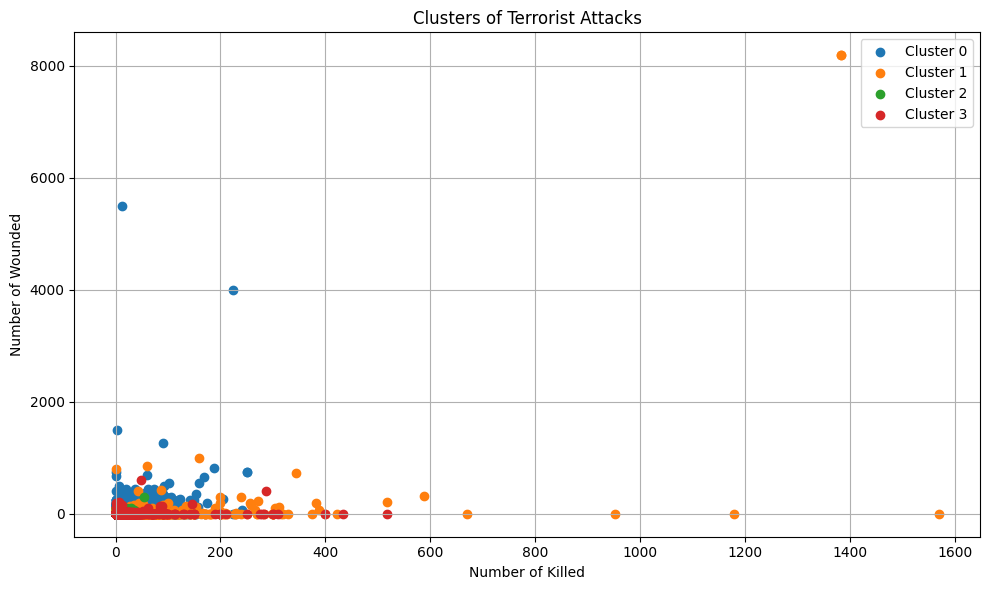

In [8]:

selected_columns = ['Killed', 'Wounded', 'AttackType']


df_selected = df[selected_columns]


df_selected = df_selected.fillna(0)


ohe = OneHotEncoder(sparse=False)
attacktype1_encoded = ohe.fit_transform(df_selected[['AttackType']])
attacktype1_labels = ohe.get_feature_names_out(['AttackType'])
df_encoded = pd.concat([df_selected[['Killed', 'Wounded']], pd.DataFrame(attacktype1_encoded, columns=attacktype1_labels)], axis=1)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df_encoded[df_encoded['cluster'] == cluster]
    plt.scatter(cluster_data['Killed'], cluster_data['Wounded'], label=f'Cluster {cluster}')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.title('Clusters of Terrorist Attacks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


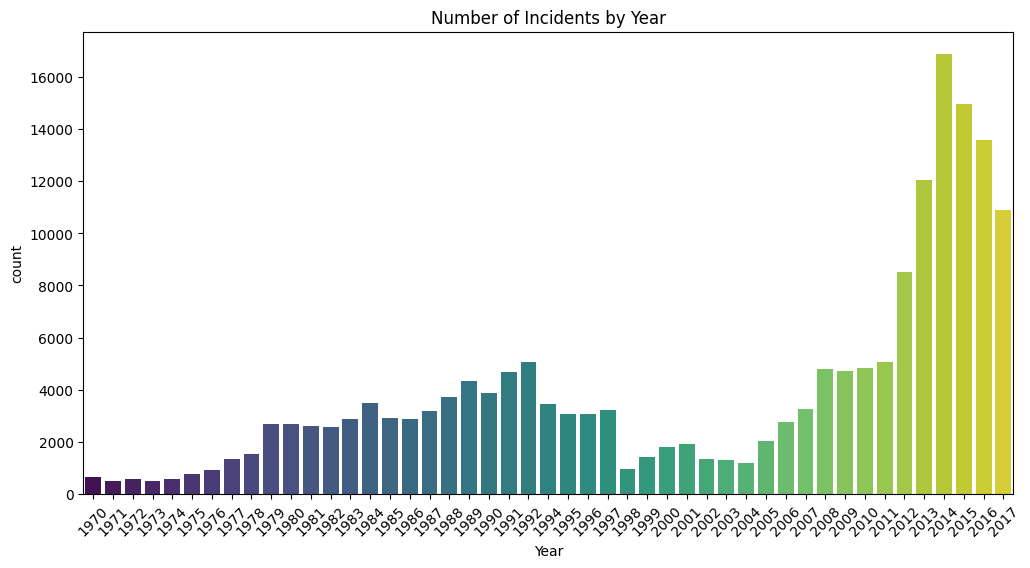

In [19]:
# Countplot of incidents by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Incidents by Year')
plt.xticks(rotation=45)
plt.show()

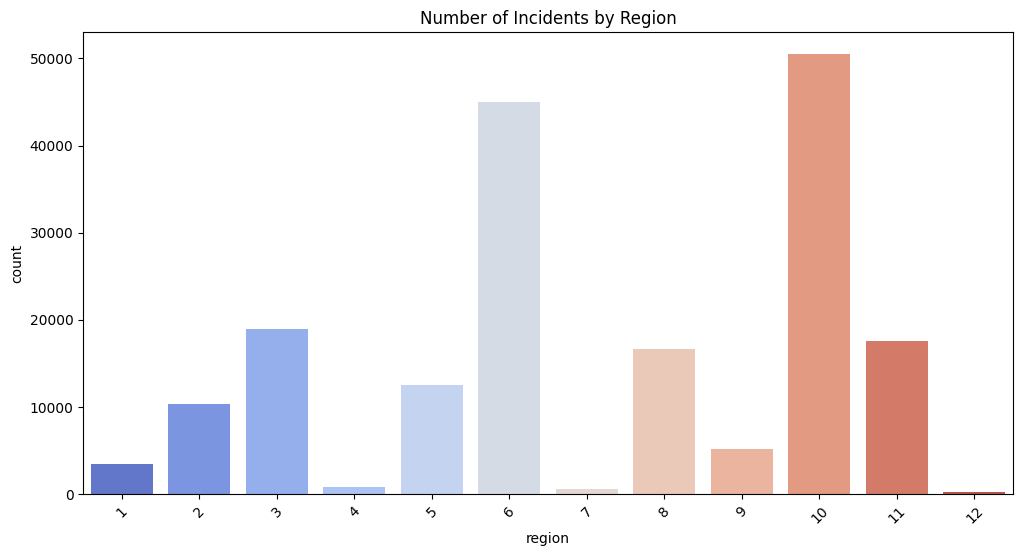

In [20]:
# Countplot of incidents by region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df, palette='coolwarm')
plt.title('Number of Incidents by Region')
plt.xticks(rotation=45)
plt.show()

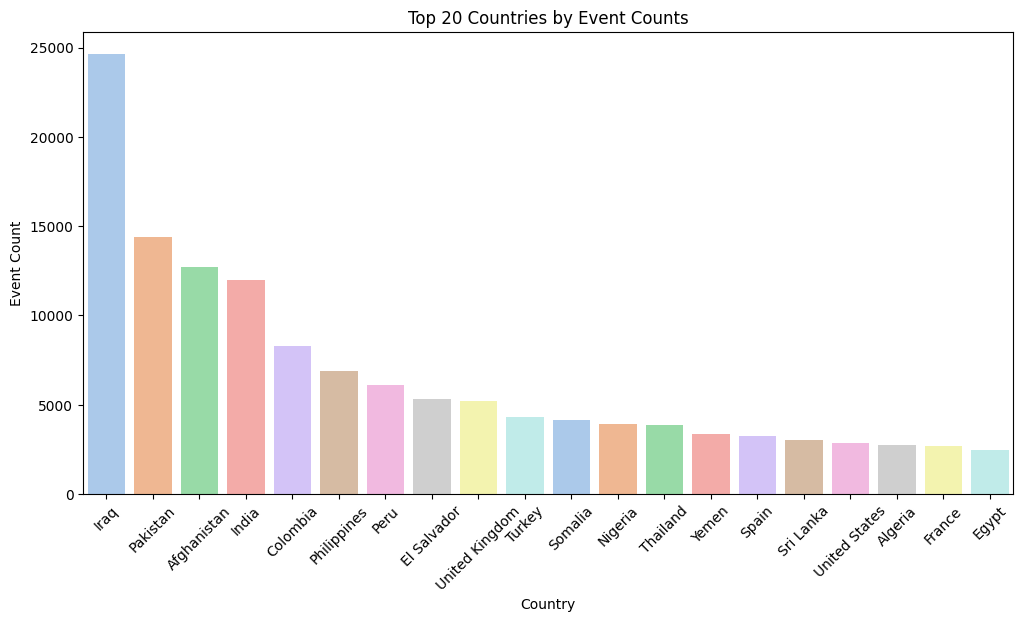

In [22]:
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts()[:20]  # Displays top 20 countries
sns.barplot(x=top_countries.index, y=top_countries.values, palette='pastel')
plt.title('Top 20 Countries by Event Counts')
plt.xlabel('Country')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()

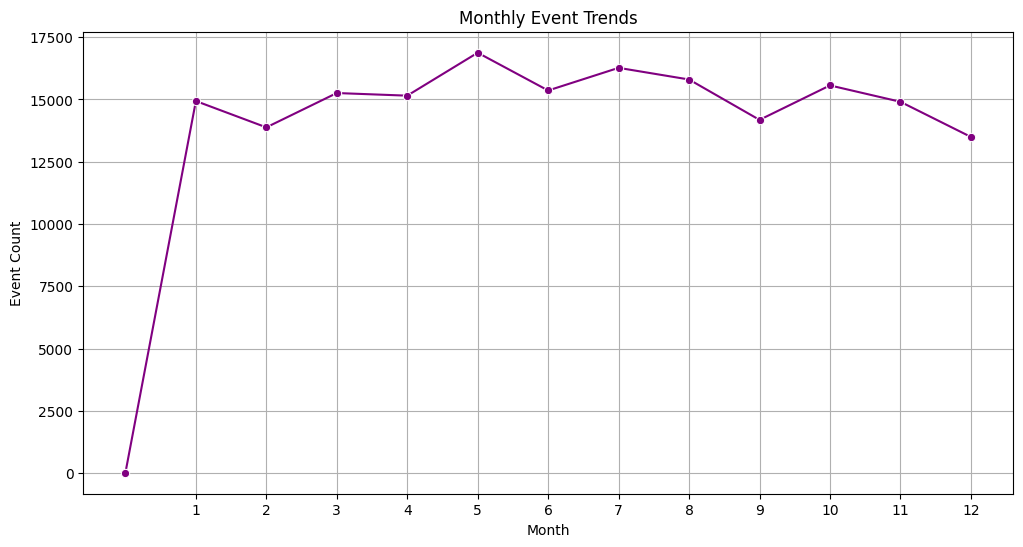

In [23]:
plt.figure(figsize=(12, 6))
monthly_counts = df.groupby('Month')['eventid'].count()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='purple')
plt.title('Monthly Event Trends')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

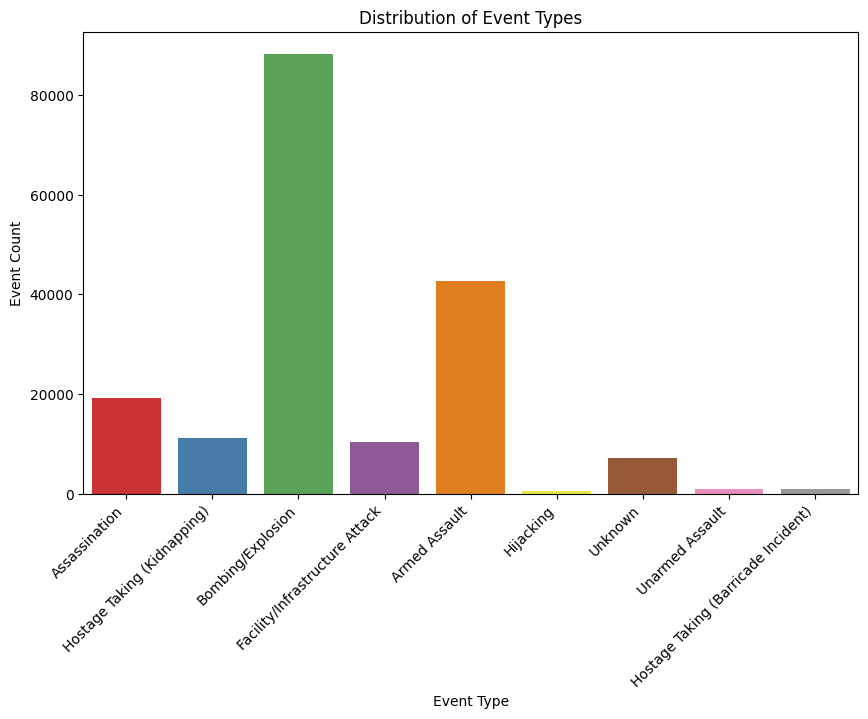

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AttackType', data=df, palette='Set1')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Event Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-26-21334a69323d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


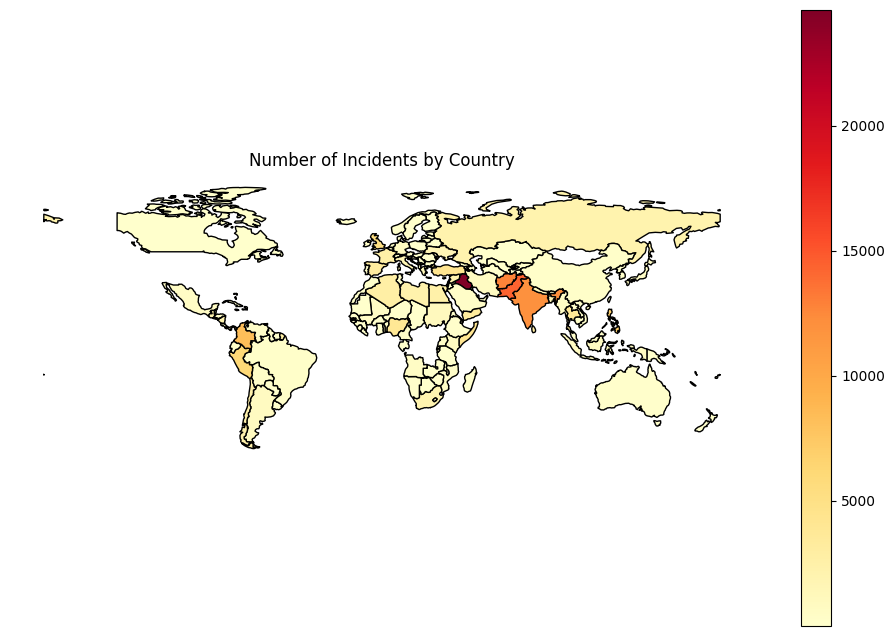

In [26]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_counts = df['Country'].value_counts()
world['event_count'] = world['name'].map(country_counts)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(column='event_count', ax=ax, legend=True, cmap='YlOrRd', edgecolor='k')
ax.set_title('Number of Incidents by Country')
ax.set_axis_off()
plt.show()

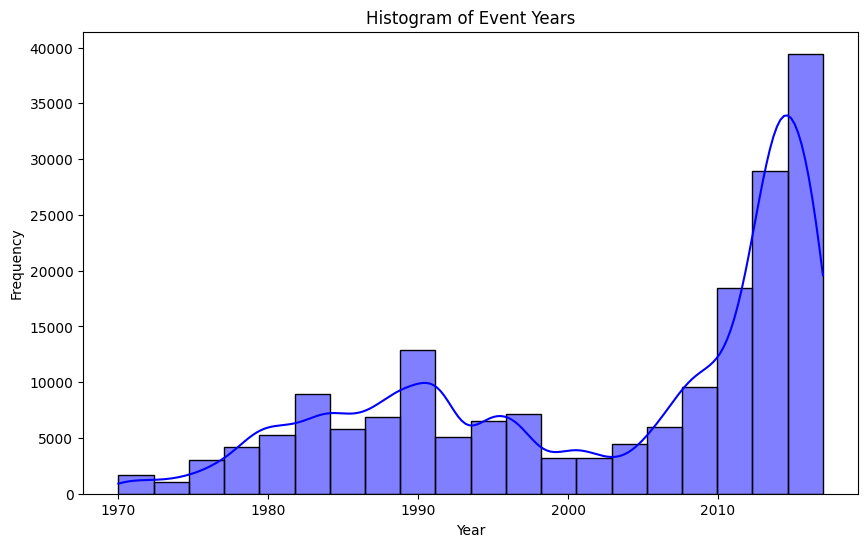

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='blue')
plt.title('Histogram of Event Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()